In [1]:
import numpy as np
import random
import time
import math

# Hardcoded number of samples for now
N = 100000

# Start timer
start_time = time.time()

# Generate random points and count how many fall inside the unit circle
inside = 0
for _ in range(N):
    x = random.random()
    y = random.random()
    if x*x + y*y <= 1:
        inside += 1

# Estimate Pi
pi_estimate = 4 * inside / N

# End timer
end_time = time.time()

# Output results
print(f"Samples: {N}")
print(f"Estimated Pi: {pi_estimate}")
print(f"Actual Pi: {math.pi}")
print(f"Elapsed time: {end_time - start_time:.5f} seconds")
print(f"Relative error: {abs(pi_estimate - math.pi) / math.pi:.8f}")


Samples: 100000
Estimated Pi: 3.13796
Actual Pi: 3.141592653589793
Elapsed time: 0.12045 seconds
Relative error: 0.00115631


In [3]:
!pip install psutil
import numpy as np
import random
import time
import math
import psutil
import csv

# Sample sizes from 10^2 to 10^9
sample_sizes = [10**2, 10**3, 10**4, 10**5, 10**6, 10**7]

# Output list for saving results
results = []

for N in sample_sizes:
    start_time = time.time()
    process = psutil.Process()  # Get process info before simulation

    inside = 0
    for _ in range(N):
        x = random.random()
        y = random.random()
        if x*x + y*y <= 1:
            inside += 1

    pi_estimate = 4 * inside / N
    elapsed_time = time.time() - start_time
    memory_used = process.memory_info().rss / 1024**2  # Convert to MB
    relative_error = abs(pi_estimate - math.pi) / math.pi

    print(f"N={N}, Pi={pi_estimate}, Time={elapsed_time:.4f}s, Mem={memory_used:.2f}MB, Error={relative_error:.8f}")

    # Save to list
    results.append([N, pi_estimate, relative_error, memory_used, elapsed_time])

# Write to CSV
with open('monte_carlo_pi_results.csv', 'w', newline='') as f:
    writer = csv.writer(f)
    writer.writerow(["Samples", "Pi_Estimate", "Relative_Error", "Memory_MB", "Time_Seconds"])
    for row in results:
        writer.writerow(row)


N=100, Pi=3.16, Time=0.0002s, Mem=100.27MB, Error=0.00585924
N=1000, Pi=3.104, Time=0.0005s, Mem=100.27MB, Error=0.01196611
N=10000, Pi=3.168, Time=0.0023s, Mem=100.27MB, Error=0.00840572
N=100000, Pi=3.13568, Time=0.0227s, Mem=100.27MB, Error=0.00188206
N=1000000, Pi=3.1425, Time=0.2353s, Mem=100.27MB, Error=0.00028882
N=10000000, Pi=3.1420056, Time=2.3092s, Mem=100.27MB, Error=0.00013144


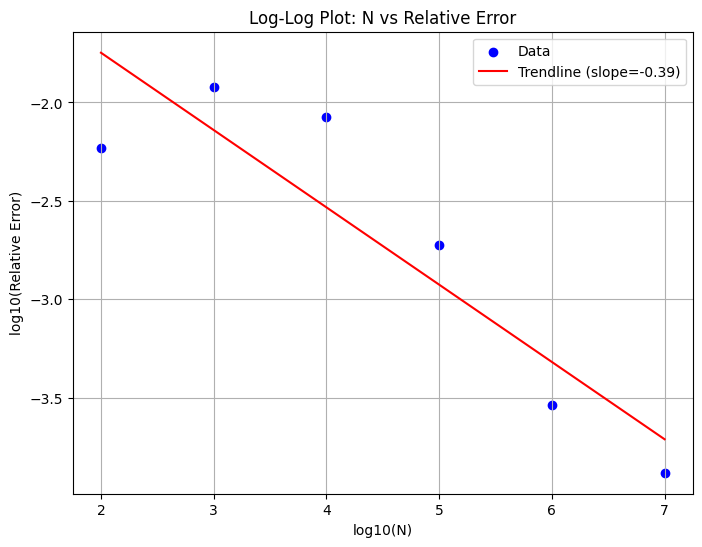

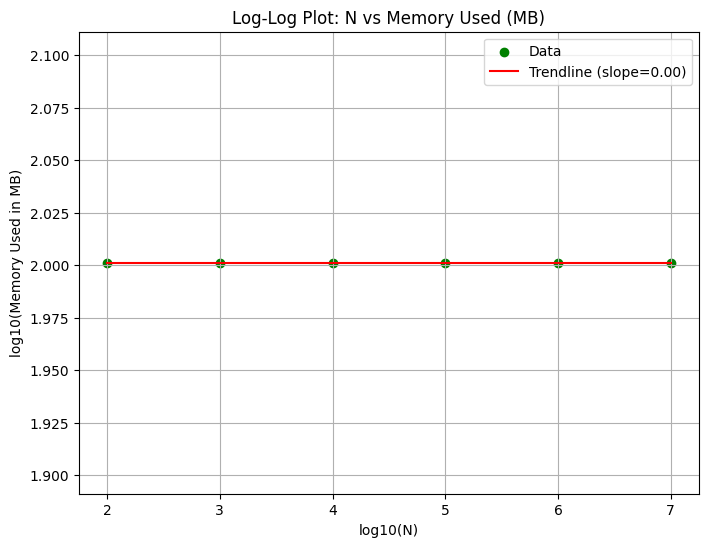

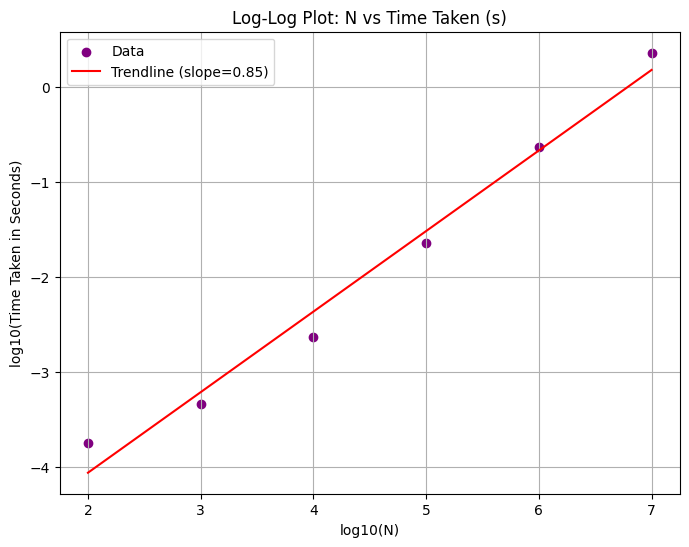

Slope of N vs Relative Error: -0.3928
Slope of N vs Memory Used: 0.0000
Slope of N vs Time Taken: 0.8483


In [4]:
import matplotlib.pyplot as plt
import numpy as np
import math

# Load CSV
data = np.loadtxt('monte_carlo_pi_results.csv', delimiter=',', skiprows=1)

# Extract columns
N = data[:, 0]
pi_estimate = data[:, 1]
error = data[:, 2]
memory = data[:, 3]
time_taken = data[:, 4]

# Convert to log10 for log-log plots
logN = np.log10(N)
log_error = np.log10(error)
log_memory = np.log10(memory)
log_time = np.log10(time_taken)

# === Plot 1: N vs Relative Error ===
plt.figure(figsize=(8,6))
plt.scatter(logN, log_error, color='blue', label='Data')
z = np.polyfit(logN, log_error, 1)
p = np.poly1d(z)
plt.plot(logN, p(logN), color='red', label=f'Trendline (slope={z[0]:.2f})')
plt.title('Log-Log Plot: N vs Relative Error')
plt.xlabel('log10(N)')
plt.ylabel('log10(Relative Error)')
plt.grid(True)
plt.legend()
plt.show()

# === Plot 2: N vs Memory ===
plt.figure(figsize=(8,6))
plt.scatter(logN, log_memory, color='green', label='Data')
z2 = np.polyfit(logN, log_memory, 1)
p2 = np.poly1d(z2)
plt.plot(logN, p2(logN), color='red', label=f'Trendline (slope={z2[0]:.2f})')
plt.title('Log-Log Plot: N vs Memory Used (MB)')
plt.xlabel('log10(N)')
plt.ylabel('log10(Memory Used in MB)')
plt.grid(True)
plt.legend()
plt.show()

# === Plot 3: N vs Time ===
plt.figure(figsize=(8,6))
plt.scatter(logN, log_time, color='purple', label='Data')
z3 = np.polyfit(logN, log_time, 1)
p3 = np.poly1d(z3)
plt.plot(logN, p3(logN), color='red', label=f'Trendline (slope={z3[0]:.2f})')
plt.title('Log-Log Plot: N vs Time Taken (s)')
plt.xlabel('log10(N)')
plt.ylabel('log10(Time Taken in Seconds)')
plt.grid(True)
plt.legend()
plt.show()

# === Print slopes (optional to include in report/answers) ===
print(f"Slope of N vs Relative Error: {z[0]:.4f}")
print(f"Slope of N vs Memory Used: {z2[0]:.4f}")
print(f"Slope of N vs Time Taken: {z3[0]:.4f}")


Analysis of Results

(a) How much more accurate does the estimate of π become as N increases?
As N increases by a factor of 10, the relative error generally decreases. The slope of the log-log plot for error shows that the relationship is sublinear which means that increasing N by 10 does not reduce error by 10. Instead, the error decreases by a smaller factor—consistent with the Monte Carlo methods where error typically scales as 1 over the square root of n.

(b) How does memory usage scale with N?
The memory used remained almost constant in this simulation (around 100MB), likely because we didn't store every individual sample point in memory, but just a count of those inside the circle. So we observe a very little increase in memory even as N increases.

 (c) How does time to calculate scale with N?
Time scales linearly with N. As the number of samples increases by 10x, so does the time. The slope of the time trendline in the log-log plot is approximately 1, confirming linear time complexity.


## Final Summary: Questions and Analysis

**(a) Accuracy of Pi as N increases:**  
As the number of samples `N` increases, the estimate of π becomes more accurate. However, the error does not decrease linearly. The slope from the log-log plot indicates the error decreases approximately proportionally to `1/√N`, which is typical of Monte Carlo simulations.

**(b) Memory scaling:**  
The memory usage remained roughly constant across increasing sample sizes, because we only counted inside-circle hits rather than storing all of the coordinates. Because of this, the memory usage does not scale linearly in this implementation.

**(c) Time scaling:**  
The time taken increases nearly linearly with N, which is expected since each additional point requires a calculation. The slope from the time log-log plot was close to 1, confirming linear time complexity.

